### 항만 서비스 개선 지표
- 선석 점유율

In [48]:
import pandas as pd
PATH  = '../data/'

df = pd.read_csv(PATH + '액체_모델용.csv')

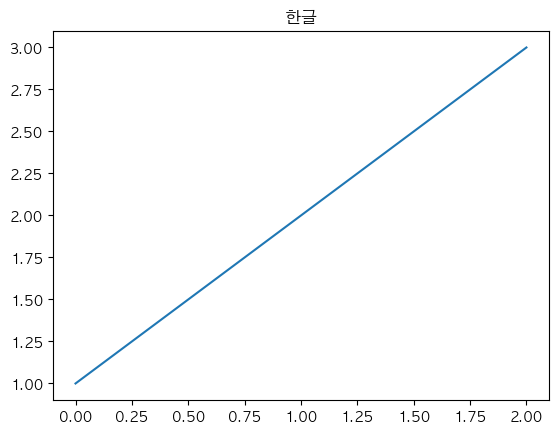

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="AppleGothic") # 라이브러리 불러오기와 함께 한번만 실행

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

In [50]:
df.columns

Index(['Datetime', 'ETA_Year', 'ETA_Month', 'ETA_Day', 'ETA_Hour', '호출부호',
       '입항일시', '출항일시', '접안_대기시간_분', '출항_대기시간_분', 'Service_Time_Start',
       'Service_Time_End', '계선장소_코드', '계선장소_숫자', '계선장소명', '선박용도',
       'Service_Time_분', '대기율', '총톤수', '재화중량톤수', '선박제원(총길이, m)', '선박제원(너비, m)',
       '만재흘수(m)', '깊이(m)', '길이1(m)', 'ETA_Minute', '풍속(m/s)', '풍향(deg)',
       'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)',
       '유의파고(m)', '평균파고(m)', '파주기(sec)', '파향(deg)', '액체화물'],
      dtype='object')

In [51]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Date'] = df['Datetime'].dt.date

### 선석 가용시간 확인
- 선석이 비어있어도 100% 돌리지 않음

In [52]:
result_df = pd.DataFrame(index=df['계선장소명'].unique(), columns=['2020', '2021', '2022'])

for year in [2020, 2021, 2022]:
    df_year = df[df['ETA_Year'] == year][['계선장소명', 'Date']]
    result_year = df_year.groupby('계선장소명')['Date'].nunique()
    result_df[str(year)] = result_year

result_df

2020   2021   2022
SK2부두 01      357.0  360.0  359.0
가스부두          270.0  246.0  226.0
SK1부두 12      155.0  162.0  137.0
정박지-M1        192.0  222.0  247.0
현대오일터미널신항부두   307.0  324.0  308.0
...             ...    ...    ...
벙커링전용정박지-B11    NaN   90.0  223.0
벙커링전용정박지-B32    NaN   19.0   45.0
일반부두 05         NaN    NaN    1.0
일반부두 02         NaN    NaN    1.0
벙커링전용정박지-B22    NaN    NaN    4.0

[125 rows x 3 columns]

In [6]:
result_df.reset_index()

index   2020   2021   2022
0        SK2부두 01  357.0  360.0  359.0
1            가스부두  270.0  246.0  226.0
2        SK1부두 12  155.0  162.0  137.0
3          정박지-M1  192.0  222.0  247.0
4     현대오일터미널신항부두  307.0  324.0  308.0
..            ...    ...    ...    ...
120  벙커링전용정박지-B11    NaN   90.0  223.0
121  벙커링전용정박지-B32    NaN   19.0   45.0
122       일반부두 05    NaN    NaN    1.0
123       일반부두 02    NaN    NaN    1.0
124  벙커링전용정박지-B22    NaN    NaN    4.0

[125 rows x 4 columns]

In [7]:
result_df.reset_index(inplace = True)

In [8]:
result_df.rename(columns = {'index':'계선장소명'}, inplace = True)
result_df

계선장소명   2020   2021   2022
0        SK2부두 01  357.0  360.0  359.0
1            가스부두  270.0  246.0  226.0
2        SK1부두 12  155.0  162.0  137.0
3          정박지-M1  192.0  222.0  247.0
4     현대오일터미널신항부두  307.0  324.0  308.0
..            ...    ...    ...    ...
120  벙커링전용정박지-B11    NaN   90.0  223.0
121  벙커링전용정박지-B32    NaN   19.0   45.0
122       일반부두 05    NaN    NaN    1.0
123       일반부두 02    NaN    NaN    1.0
124  벙커링전용정박지-B22    NaN    NaN    4.0

[125 rows x 4 columns]

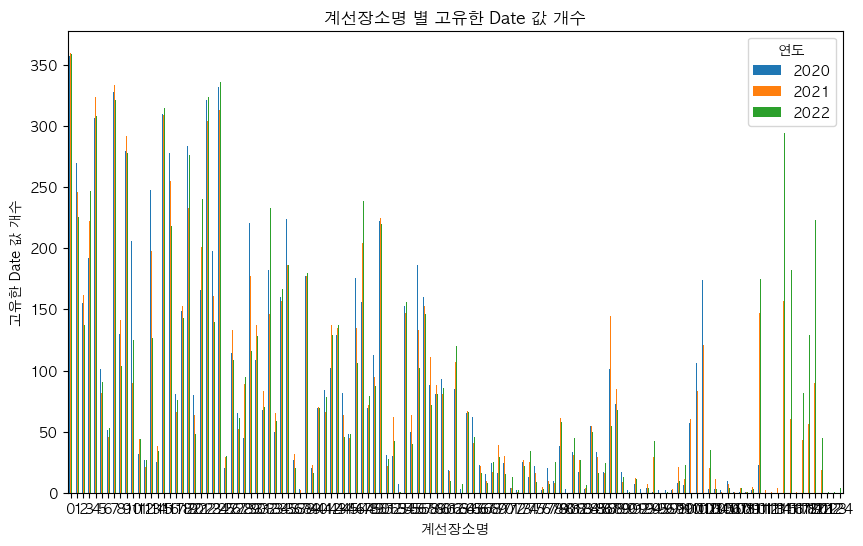

In [9]:
result_df.plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('계선장소명 별 고유한 Date 값 개수')
plt.xlabel('계선장소명')
plt.ylabel('고유한 Date 값 개수')
plt.legend(title='연도')
plt.show()

특정 시간 만큼 가용하는 선석이 정해져 있다.


In [10]:
result = pd.melt(result_df, id_vars=['계선장소명'], var_name='ETA_Year', value_name='선석가용일')

In [11]:
result

계선장소명 ETA_Year  선석가용일
0        SK2부두 01     2020  357.0
1            가스부두     2020  270.0
2        SK1부두 12     2020  155.0
3          정박지-M1     2020  192.0
4     현대오일터미널신항부두     2020  307.0
..            ...      ...    ...
370  벙커링전용정박지-B11     2022  223.0
371  벙커링전용정박지-B32     2022   45.0
372       일반부두 05     2022    1.0
373       일반부두 02     2022    1.0
374  벙커링전용정박지-B22     2022    4.0

[375 rows x 3 columns]

### 선석점유율 계산(가용시간 365 )

In [12]:
temp = df.groupby(['계선장소명', 'ETA_Year'])[['Service_Time_분', '접안_대기시간_분','재화중량톤수']].sum().reset_index()
temp

계선장소명  ETA_Year  Service_Time_분  접안_대기시간_분       재화중량톤수
0    (구)벙커링전용정박지 E1      2020        494256.0      96360  2208586.000
1    (구)벙커링전용정박지 E1      2021        390150.0      96709  1341799.880
2    (구)벙커링전용정박지 E2      2020        405056.0      44702  3939495.940
3    (구)벙커링전용정박지 E2      2021        265849.0      45255  2517175.000
4    (구)벙커링전용정박지 E3      2020        194245.0      37628  3877494.000
..              ...       ...             ...        ...          ...
334         화암부두 06      2020          3375.0          0     1829.000
335         화암부두 06      2021          2487.0          0     3545.740
336            효성부두      2020        180401.0      28403   665330.075
337            효성부두      2021        263291.0      16187   454983.680
338            효성부두      2022        316278.0      22761   575153.340

[339 rows x 5 columns]

In [13]:
print(24*60*360)

518400


In [14]:
temp['점유율(365)'] = temp['Service_Time_분'] / 518400

In [15]:
temp['점유율(365)'].mean()

0.5747372730707601

In [16]:
temp['대기율'] = temp['접안_대기시간_분']/temp['Service_Time_분']

In [17]:
temp

계선장소명  ETA_Year  Service_Time_분  접안_대기시간_분       재화중량톤수  \
0    (구)벙커링전용정박지 E1      2020        494256.0      96360  2208586.000   
1    (구)벙커링전용정박지 E1      2021        390150.0      96709  1341799.880   
2    (구)벙커링전용정박지 E2      2020        405056.0      44702  3939495.940   
3    (구)벙커링전용정박지 E2      2021        265849.0      45255  2517175.000   
4    (구)벙커링전용정박지 E3      2020        194245.0      37628  3877494.000   
..              ...       ...             ...        ...          ...   
334         화암부두 06      2020          3375.0          0     1829.000   
335         화암부두 06      2021          2487.0          0     3545.740   
336            효성부두      2020        180401.0      28403   665330.075   
337            효성부두      2021        263291.0      16187   454983.680   
338            효성부두      2022        316278.0      22761   575153.340   

     점유율(365)       대기율  
0    0.953426  0.194960  
1    0.752604  0.247876  
2    0.781358  0.110360  
3    0.512826  0.170228  
4    0.374701  0.193714  
..        ...       ...  
334  0.006510  0.000000  
335  0.004797  0.000000  
336  0.347996  0.157444  
337  0.507892  0.061480  
338  0.610104  0.071965  

[339 rows x 7 columns]

In [18]:
temp.sort_values(by = ['점유율(365)','대기율'], ascending = False).head(10)

계선장소명  ETA_Year  Service_Time_분  접안_대기시간_분       재화중량톤수   점유율(365)  \
260     장생포호안      2020       7943788.0      73511   837774.076  15.323665   
261     장생포호안      2021       4494964.0      51566   960003.990   8.670841   
93   SK2부두 01      2021       2334716.0     462070  3449572.775   4.503696   
92   SK2부두 01      2020       2060163.0     730278  3604559.495   3.974080   
94   SK2부두 01      2022       2025701.0     494462  3654931.008   3.907602   
262     장생포호안      2022       2011262.0      24713   865078.023   3.879749   
72   S-OIL1부두      2021       1876440.0     740333  4847544.025   3.619676   
74   S-OIL2부두      2020       1653179.0     540679  7267341.245   3.189003   
264    정박지-E1      2021       1593989.0     228962  2951917.865   3.074824   
75   S-OIL2부두      2021       1565566.0     452563  5960795.350   3.019996   

          대기율  
260  0.009254  
261  0.011472  
93   0.197913  
92   0.354476  
94   0.244094  
262  0.012287  
72   0.394541  
74   0.327054  
264  0.143641  
75   0.289073

### 선석점유율 계산(개별 가용시간)

In [19]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   계선장소명           339 non-null    object 
 1   ETA_Year        339 non-null    int64  
 2   Service_Time_분  339 non-null    float64
 3   접안_대기시간_분       339 non-null    int64  
 4   재화중량톤수          339 non-null    float64
 5   점유율(365)        339 non-null    float64
 6   대기율             339 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 18.7+ KB


In [20]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   계선장소명     375 non-null    object 
 1   ETA_Year  375 non-null    object 
 2   선석가용일     339 non-null    float64
dtypes: float64(1), object(2)
memory usage: 8.9+ KB


In [21]:
result['ETA_Year'] = result['ETA_Year'].astype(int)

In [22]:
df = pd.merge(temp, result, on=['계선장소명', 'ETA_Year'], how='outer')

In [23]:
df

계선장소명  ETA_Year  Service_Time_분  접안_대기시간_분      재화중량톤수  \
0    (구)벙커링전용정박지 E1      2020        494256.0    96360.0  2208586.00   
1    (구)벙커링전용정박지 E1      2021        390150.0    96709.0  1341799.88   
2    (구)벙커링전용정박지 E2      2020        405056.0    44702.0  3939495.94   
3    (구)벙커링전용정박지 E2      2021        265849.0    45255.0  2517175.00   
4    (구)벙커링전용정박지 E3      2020        194245.0    37628.0  3877494.00   
..              ...       ...             ...        ...         ...   
370           정일컨부두      2022             NaN        NaN         NaN   
371     현대미포의장안벽 02      2022             NaN        NaN         NaN   
372         화암부두 05      2022             NaN        NaN         NaN   
373     신항컨테이너부두 01      2022             NaN        NaN         NaN   
374         화암부두 01      2022             NaN        NaN         NaN   

     점유율(365)       대기율  선석가용일  
0    0.953426  0.194960  174.0  
1    0.752604  0.247876  121.0  
2    0.781358  0.110360  106.0  
3    0.512826  0.170228   83.0  
4    0.374701  0.193714   57.0  
..        ...       ...    ...  
370       NaN       NaN    NaN  
371       NaN       NaN    NaN  
372       NaN       NaN    NaN  
373       NaN       NaN    NaN  
374       NaN       NaN    NaN  

[375 rows x 8 columns]

In [24]:
df['점유율(개별)'] = df['Service_Time_분'] / (24*60*df['선석가용일'])

- 점유율 낮고, 대기율이 높은 선석 > 비효율적

In [36]:
df = df.sort_values(by=['대기율', '점유율(개별)'], ascending=[False, True])
row_roi = df['계선장소명'].to_list()

In [38]:
df_2022 = df[df['ETA_Year'] == 2022]
row_roi = df_2022['계선장소명'].to_list()

In [45]:
df_2022['대기율/점유율_비율'] = df_2022['대기율'] / df_2022['점유율(개별)']
df_2022 = df_2022[df_2022['대기율'] > 0]
df_sorted = df_2022.sort_values(by='대기율/점유율_비율', ascending=False)

/var/folders/nz/vk3v33x95bs4kf3ymy0z0my00000gn/T/ipykernel_26532/3274914529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['대기율/점유율_비율'] = df_2022['대기율'] / df_2022['점유율(개별)']


In [47]:
df_sorted.head()

계선장소명  ETA_Year  Service_Time_분  접안_대기시간_분      재화중량톤수  점유율(365)  \
283    정박지-M4      2022         76016.0    53744.0  213594.044  0.146636   
280    정박지-M3      2022         54026.0    35805.0  130642.244  0.104217   
289    정박지-M6      2022         78909.0    41740.0  167140.366  0.152216   
139  대한통운신항부두      2022          2695.0     1005.0    8179.000  0.005199   
231   용잠부두 02      2022        146155.0    61290.0  474655.000  0.281935   

          대기율  선석가용일   점유율(개별)  대기율/점유율_비율  
283  0.707009   79.0  0.668214    1.058058  
280  0.662736   46.0  0.815610    0.812565  
289  0.528964   66.0  0.830271    0.637097  
139  0.372913    3.0  0.623843    0.597767  
231  0.419349  129.0  0.786795    0.532984

### 추가 지표
- 선석점유율
- 선박대기율
- 연간 처리량 : 선박별 하역량의 합(부재) >> 총재화톤수 합
- 연간 접안 척수 : 하역 처리 선박 수 합
- 선박당 평균 서비스 시간 : 입항선박접안시간(합)/처리접안척수
- 선박당 평균 대기 시간 : 대기선박의 대기시간 합 / 총 대기 선박

### 대기시간 예측 후 실행 선석 운영 시스템 개선 프로세스
##### 1. 비효율적인 선석 식별
대기율이 높고 점유율이 낮은 선석은 운영 효율을 개선 필요한 선석

##### 2. 대기율 높은 선석 대기시간 최소화
대기율이 높은 선석에 대해서는 우선순위를 부여 > 대기시간 최소화

##### 3. 인적/물적 자원 할당 최적화
선석의 점유율을 고려하여 자원(인적, 물적)을 최적으로 할당

##### 4. 시간대별 대기시간 패턴 파악(선석별로 보면 뭔가 다를지도)
시간대별로 대기율과 점유율을 분석하여 피크 시간대와 소요 시간을 파악하고 운영 일정을 최적화

##### 5. 문제 해결 및 개선 계획 수립
대기율이나 점유율이 높은 선석에 대해, 인프라 개선, 운영 일정 조정 등의 개선 계획을 수립

##### 6. 대기시간 예측 후 실행